In [1]:
import quandl
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore') 
plt.style.use('seaborn')

In [2]:
oil = quandl.get("NSE/OIL", authtoken="7L",
start_date="1980-01-01", 
end_date="2020-01-01")

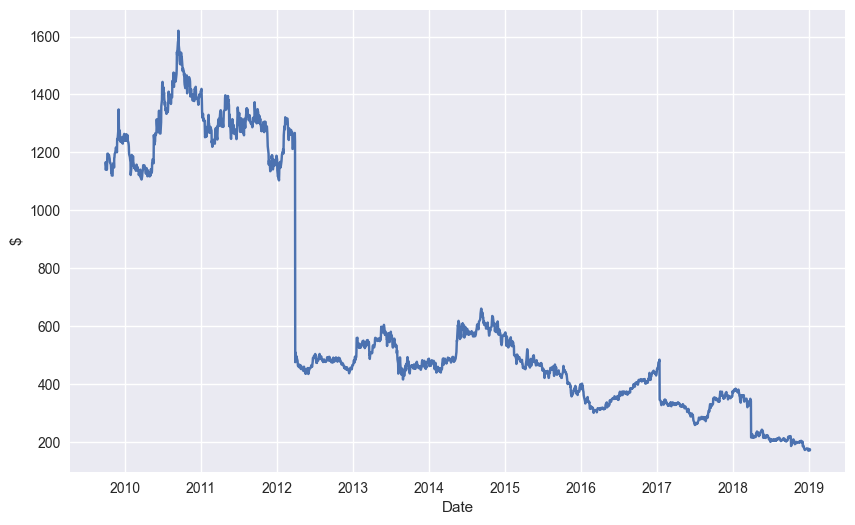

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(oil.Close)
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

In [4]:
import yfinance as yf 
import numpy as np 
import pandas as pd 
import datetime 
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
ticker='^GSPC'
start=datetime.datetime(2015, 1,1)
end=datetime.datetime(2021,1,1)
SP_prices=yf.download(ticker, start=start, end=end, interval='1mo')\
    .Close

[*********************100%***********************]  1 of 1 completed


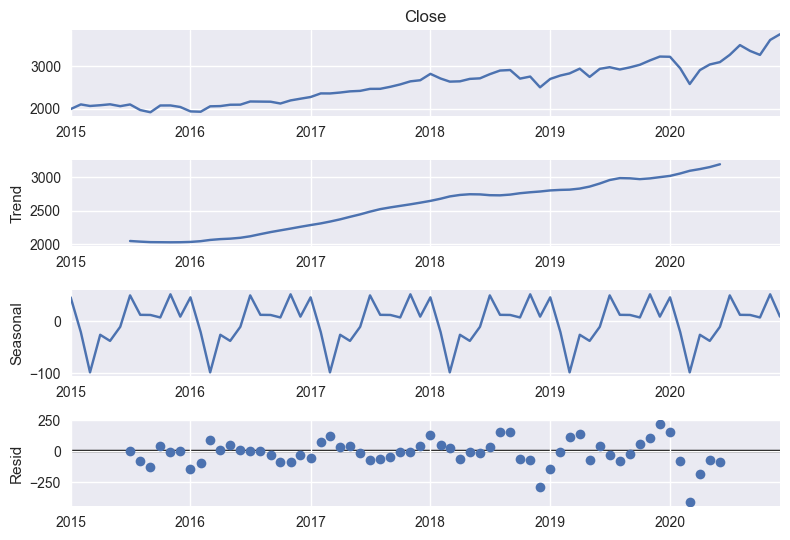

In [6]:
seasonal_decompose(SP_prices, period=12).plot()
plt.show()

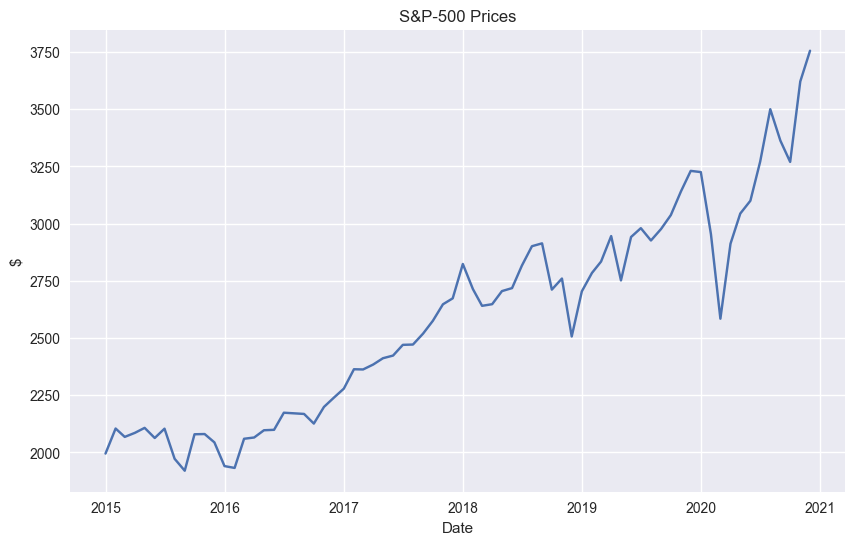

In [7]:
plt.figure(figsize=(10,6))
plt.plot(SP_prices)
plt.title('S&P-500 Prices')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()


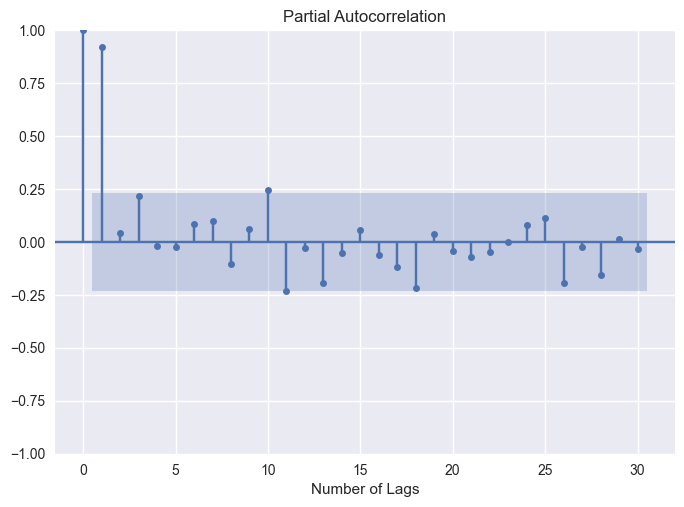

In [8]:
sm.graphics.tsa.plot_pacf(SP_prices, lags=30)
plt.xlabel('Number of Lags')
plt.show()

In [9]:
from fredapi import Fred 
import statsmodels.api as sm 

In [10]:
fred=Fred(api_key='08b6')

In [11]:
energy=fred.get_series('CAPUTLG2211A2S',
observation_start='2010-01-01',
observation_end='2020-12-31')
energy.head(12)


2010-01-01    83.5479
2010-02-01    84.7376
2010-03-01    81.8281
2010-04-01    79.2697
2010-05-01    82.5214
2010-06-01    84.1151
2010-07-01    83.3129
2010-08-01    83.4754
2010-09-01    83.4206
2010-10-01    80.5708
2010-11-01    81.4790
2010-12-01    85.6763
dtype: float64

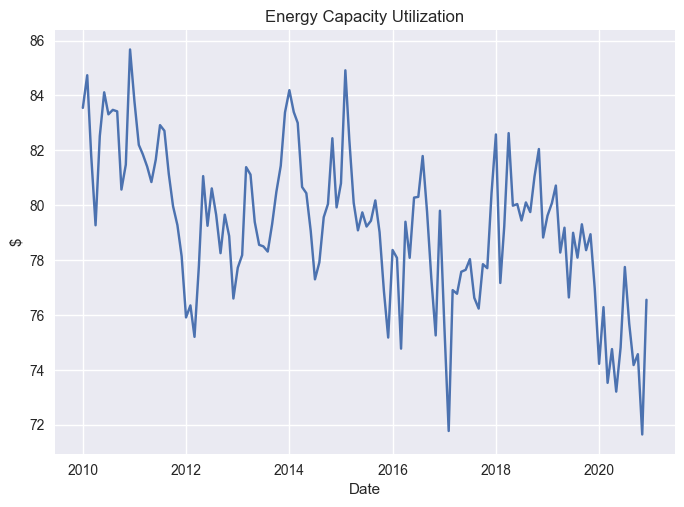

In [12]:
plt.plot(energy)
plt.title('Energy Capacity Utilization')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

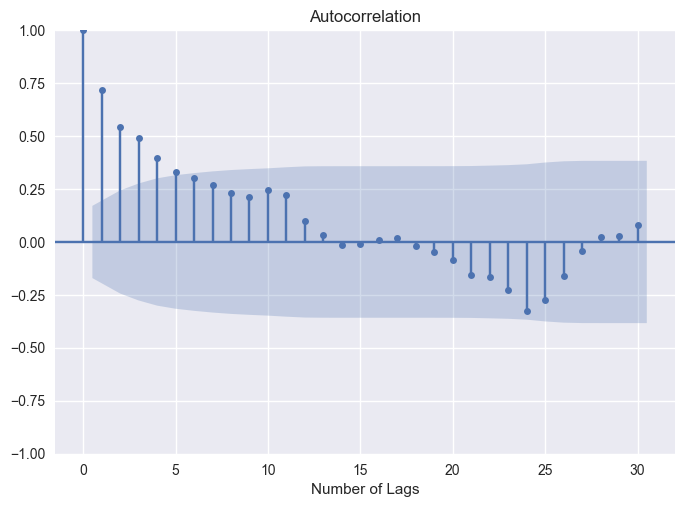

In [13]:
sm.graphics.tsa.plot_acf(energy, lags=30)
plt.xlabel('Number of Lags')
plt.show()

In [14]:
stat_test=adfuller(SP_prices)[0:2]
print('The test statistic and p-value of ADF test ar{}'.format(stat_test))

The test statistic and p-value of ADF test ar(0.03029512007292596, 0.9609669053518538)


In [15]:
diff_SP_price=SP_prices.diff()


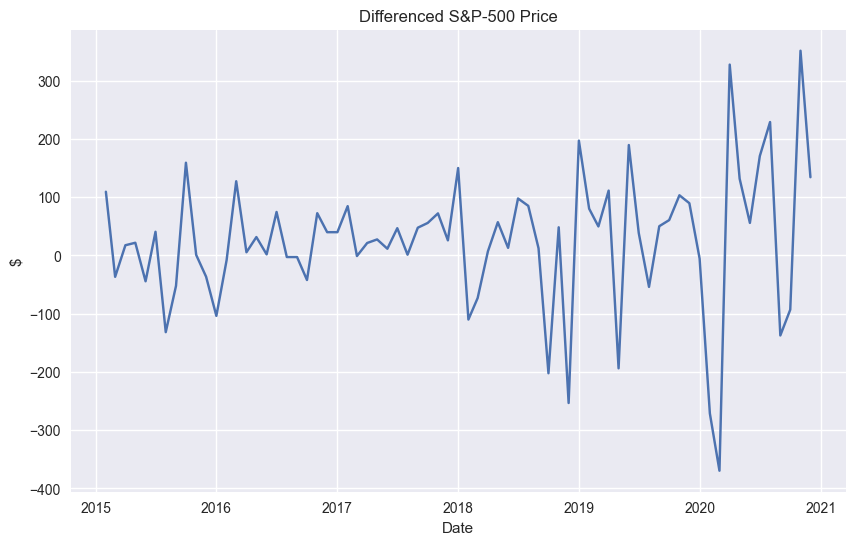

In [16]:
plt.figure(figsize=(10,6))
plt.plot(diff_SP_price)
plt.title('Differenced S&P-500 Price')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

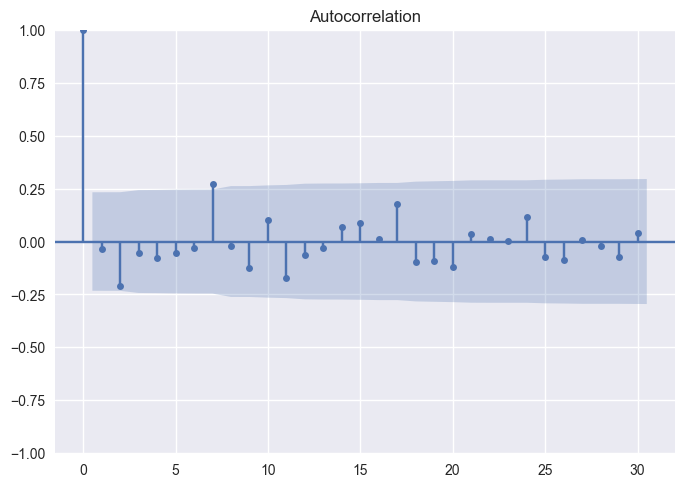

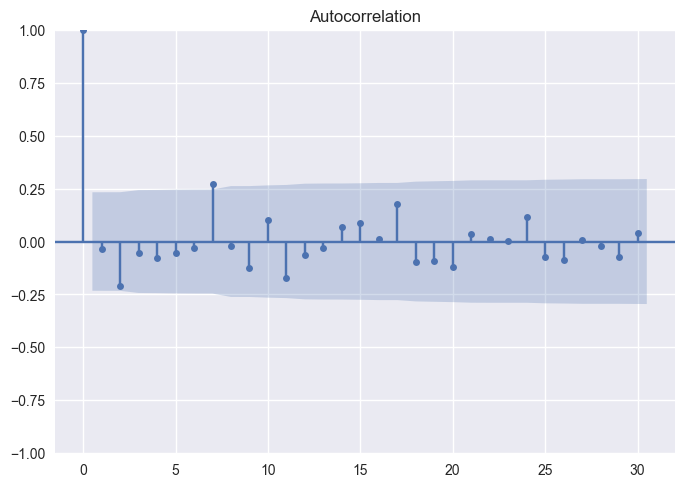

In [17]:
sm.graphics.tsa.plot_acf(diff_SP_price.dropna(), lags=30)


In [18]:
seasonal_index=energy.resample('Q').mean()


In [19]:
dates=energy.index.year.unique()
deseasonalized=[]
for i in dates:
    for j in range(1,13):
        deseasonalized.append((energy[str(i)][energy[str(i)]\
            .index.month==j]))
    concat_deseasonalized=np.concatenate(deseasonalized)
    

In [20]:
deseason_energy=[]
for i, s in zip(range(0, len(energy), 3), range(len(seasonal_index))):
    deseason_energy.append(concat_deseasonalized[i:i+3]/
    seasonal_index.iloc[s])
concat_deseason_energy=np.concatenate(deseason_energy)
deseason_energy=pd.DataFrame(concat_deseason_energy,
index=energy.index)
deseason_energy.columns=['Deseasonalized Energy']
deseason_energy.head()

,Deseasonalized Energy
2010-01-01,1.002119
2010-02-01,1.016389
2010-03-01,0.981491
2010-04-01,0.967072
2010-05-01,1.006742


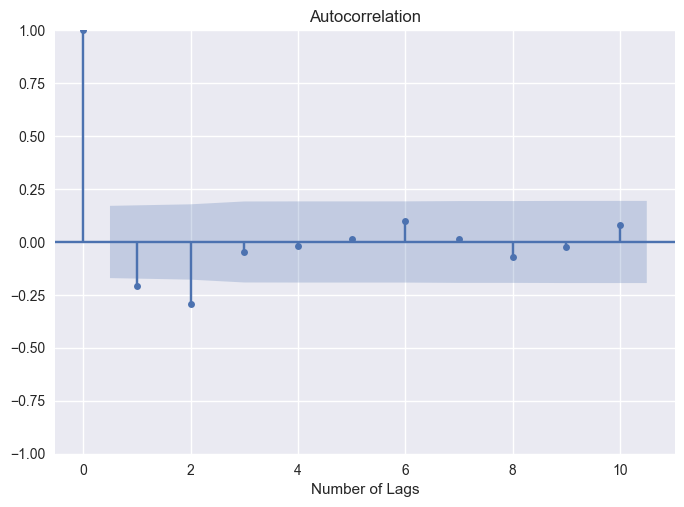

In [21]:
sm.graphics.tsa.plot_acf(deseason_energy, lags=10)
plt.xlabel('Number of Lags')
plt.show()

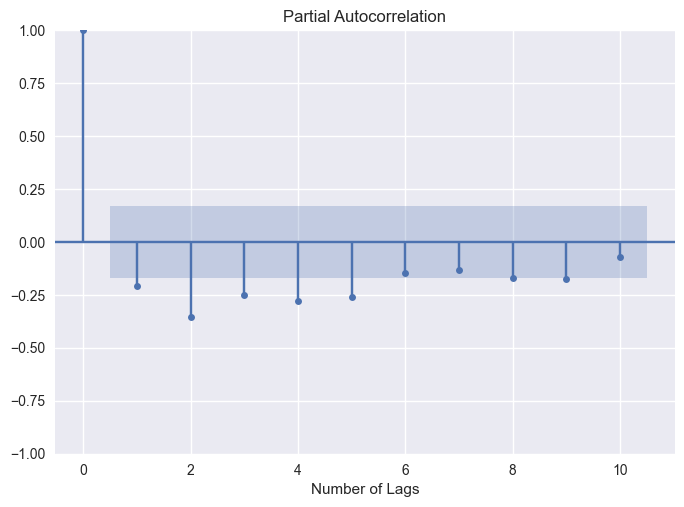

In [22]:
sm.graphics.tsa.plot_pacf(deseason_energy, lags=10)
plt.xlabel('Number of Lags')
plt.show()

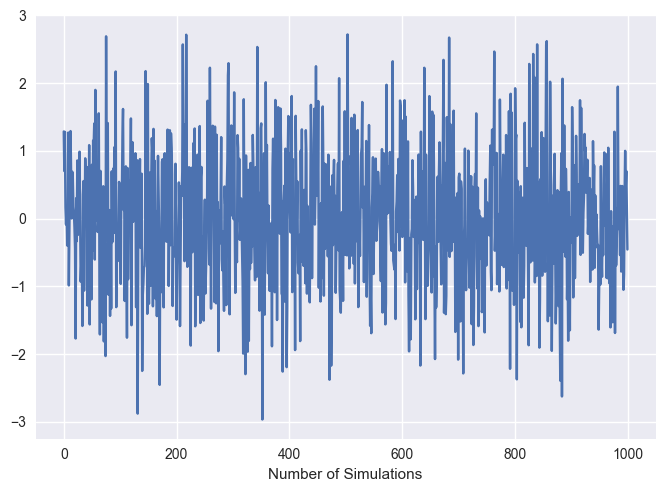

In [23]:
mu=0
std=1
WN=np.random.normal(mu,std,1000)

plt.plot(WN)
plt.xlabel('Number of Simulations')
plt.show()

In [24]:
ticker=['AAPL','MSFT']
start=datetime.datetime(2019,1,1)
end=datetime.datetime(2021,1,1)
stock_prices=yf.download(ticker, start, end, interval='1d')\
    .Close

[*********************100%***********************]  2 of 2 completed


In [25]:
stock_prices=stock_prices.dropna()

In [26]:
for i in ticker:
    stat_test=adfuller(stock_prices[i])[0:2]
    print('The ADF statistic and p-value of {} are {}'\
        .format(i, stat_test))

The ADF statistic and p-value of AAPL are (0.30197458557904566, 0.9774348980254369)
The ADF statistic and p-value of MSFT are (-0.7838047612900167, 0.8238330701563908)


In [27]:
diff_stock_prices=stock_prices.diff().dropna()


In [28]:
split=int(len(diff_stock_prices['AAPL'].values)*0.95)
diff_train_aapl=diff_stock_prices['AAPL'].iloc[:split]
diff_test_aapl=diff_stock_prices['AAPL'].iloc[split:]
diff_train_msft=diff_stock_prices['MSFT'].iloc[:split]
diff_test_msft=diff_stock_prices['MSFT'].iloc[split:]



In [29]:
# diff_train_aapl.to_csv('diff_train_appl.csv')
# diff_test_aapl.to_csv('diff_test_aapl')
# diff_train_msft.to_csv('diff_train_msft')
# diff_test_msft.to_csv('diff_test_msft')

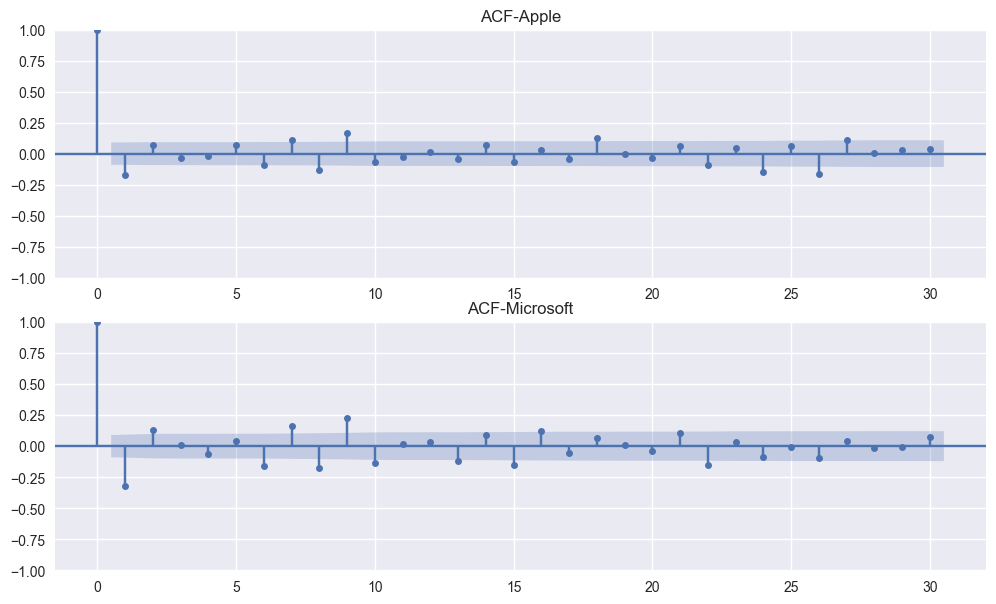

In [30]:
fig,ax=plt.subplots(2,1,figsize=(10,6))
plt.tight_layout()
sm.graphics.tsa.plot_acf(diff_train_aapl,lags=30,
ax=ax[0], title='ACF-Apple')
sm.graphics.tsa.plot_acf(diff_train_msft, lags=30, ax=ax[1], title='ACF-Microsoft')
plt.show()

In [31]:
short_moving_average_appl=diff_train_aapl.rolling(window=9).mean()
long_moving_average_appl=diff_train_aapl.rolling(window=22).mean()

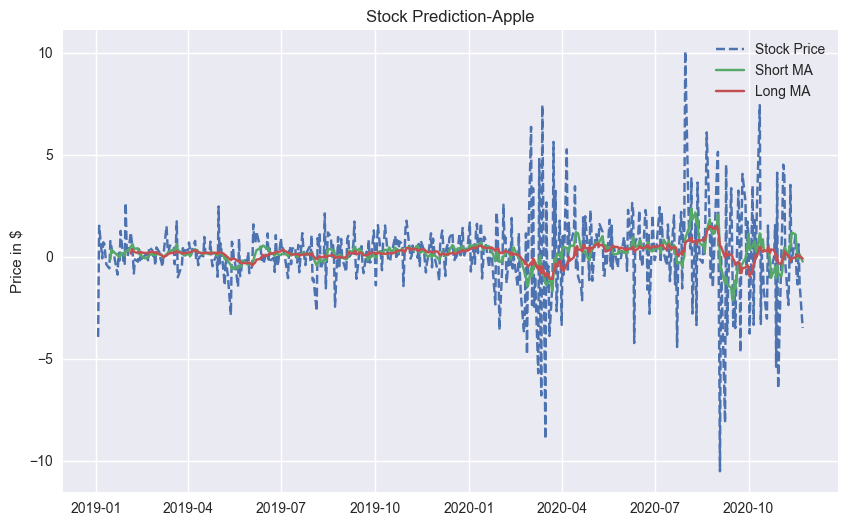

In [32]:
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(diff_train_aapl.loc[start:end].index,
diff_train_aapl.loc[start:end],
label='Stock Price', linestyle='--')
ax.plot(short_moving_average_appl.loc[start:end].index,
short_moving_average_appl.loc[start:end],
label='Short MA', linestyle='solid')
ax.plot(long_moving_average_appl.loc[start:end].index,
long_moving_average_appl.loc[start:end],
label='Long MA', linestyle='solid')
ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.set_title('Stock Prediction-Apple')
plt.show()

In [33]:
short_moving_average_msft=diff_train_msft.rolling(window=2).mean()
long_moving_average_msft=diff_train_msft.rolling(window=22).mean()

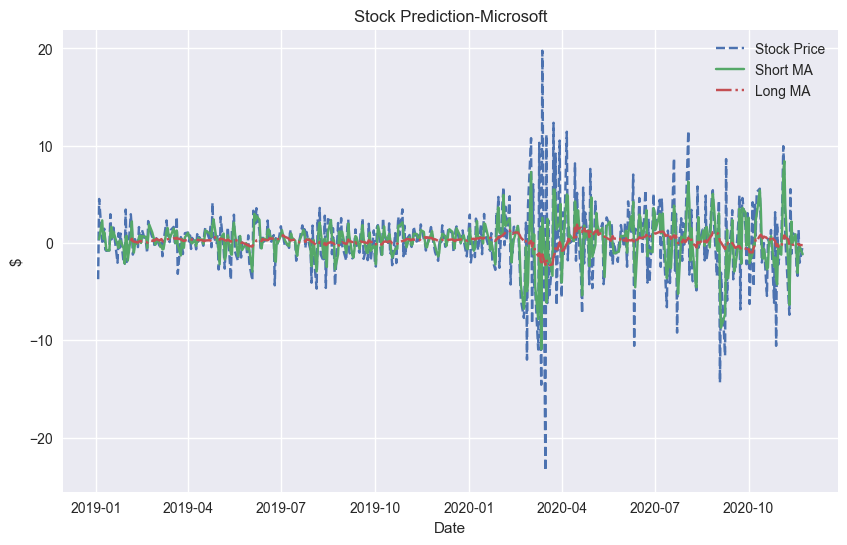

In [34]:
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(diff_train_msft.loc[start:end].index,
diff_train_msft.loc[start:end],
label='Stock Price', linestyle='--')
ax.plot(short_moving_average_msft.loc[start:end].index,
short_moving_average_msft.loc[start:end],
label='Short MA', linestyle='solid')
ax.plot(long_moving_average_msft.loc[start:end].index,
long_moving_average_msft.loc[start:end],
label='Long MA', linestyle='-.')
ax.legend(loc='best')
ax.set_ylabel('$')
ax.set_xlabel('Date')
ax.set_title('Stock Prediction-Microsoft')
plt.show()

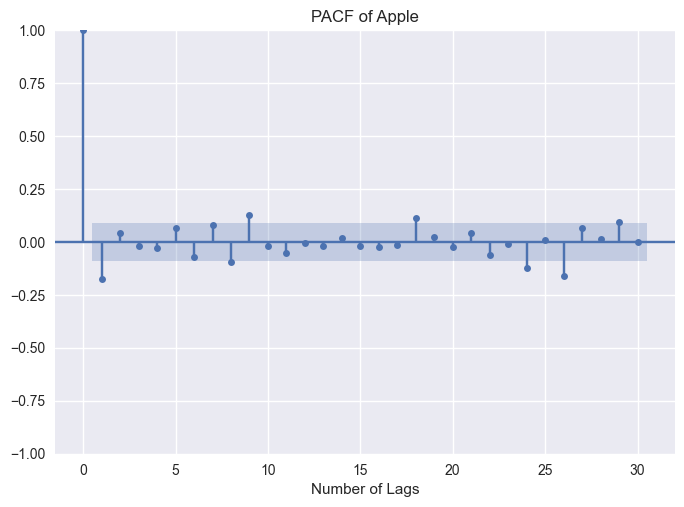

In [35]:
sm.graphics.tsa.plot_pacf(diff_train_aapl, lags=30)
plt.title('PACF of Apple')
plt.xlabel('Number of Lags')
plt.show()

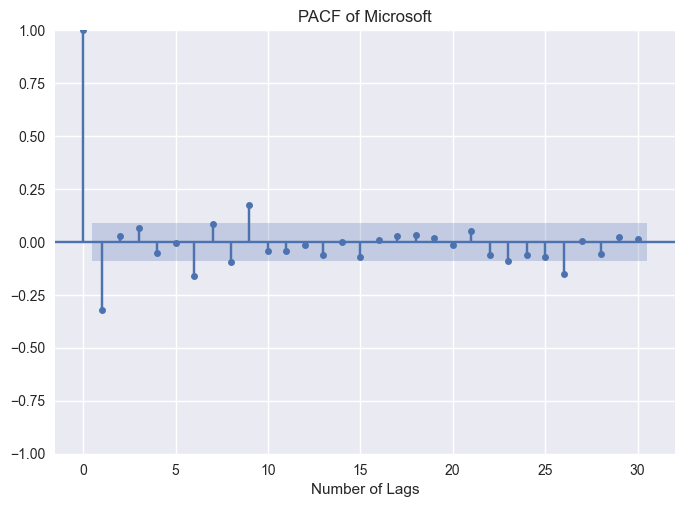

In [36]:
sm.graphics.tsa.plot_pacf(diff_train_msft, lags=30)
plt.title('PACF of Microsoft')
plt.xlabel('Number of Lags')
plt.show()

In [37]:
from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')


In [38]:
ar_aapl=AutoReg(diff_train_aapl.values, lags=29)
ar_fitted_aapl=ar_aapl.fit()

In [39]:
ar_predictions_aapl=ar_fitted_aapl.predict(start=len(diff_train_aapl),
end=len(diff_train_aapl)\
    +len(diff_test_aapl)-1,
    dynamic=False)


In [40]:
for i in range(len(ar_predictions_aapl)):
    print('=='*25)
    print('predicted values:{:.4f}& actual values:{:4f}'\
        .format(ar_predictions_aapl[i], diff_test_aapl[i]))

predicted values:1.6538& actual values:1.320000
predicted values:-0.8347& actual values:0.860001
predicted values:-0.9992& actual values:0.559998
predicted values:1.1373& actual values:2.460007
predicted values:-0.1101& actual values:3.669998
predicted values:1.7878& actual values:0.360001
predicted values:-0.9174& actual values:-0.139999
predicted values:1.7353& actual values:-0.690002
predicted values:-1.5159& actual values:1.500000
predicted values:1.8259& actual values:0.629997
predicted values:-1.2438& actual values:-2.599998
predicted values:-0.5361& actual values:1.459999
predicted values:-0.1062& actual values:-0.829994
predicted values:-0.6179& actual values:-0.630005
predicted values:1.3191& actual values:6.099998
predicted values:0.2425& actual values:-0.070000
predicted values:0.4512& actual values:0.889999
predicted values:-1.3076& actual values:-2.039993
predicted values:0.5883& actual values:1.569992
predicted values:0.2458& actual values:3.650009
predicted values:0.0188

In [41]:
ar_predictions_aapl=pd.DataFrame(ar_predictions_aapl)
ar_predictions_aapl.index=diff_test_aapl.index 

In [42]:
ar_msft=AutoReg(diff_train_msft.values, lags=26)
ar_fitted_msft=ar_msft.fit()

In [43]:
ar_predictions_msft=ar_fitted_msft.predict(start=len(diff_train_msft),
end=len(diff_train_msft)\
    +len(diff_test_msft)-1,
    dynamic=False) 

In [44]:
ar_predictions_msft=pd.DataFrame(ar_predictions_msft)
ar_predictions_msft.index=diff_test_msft.index

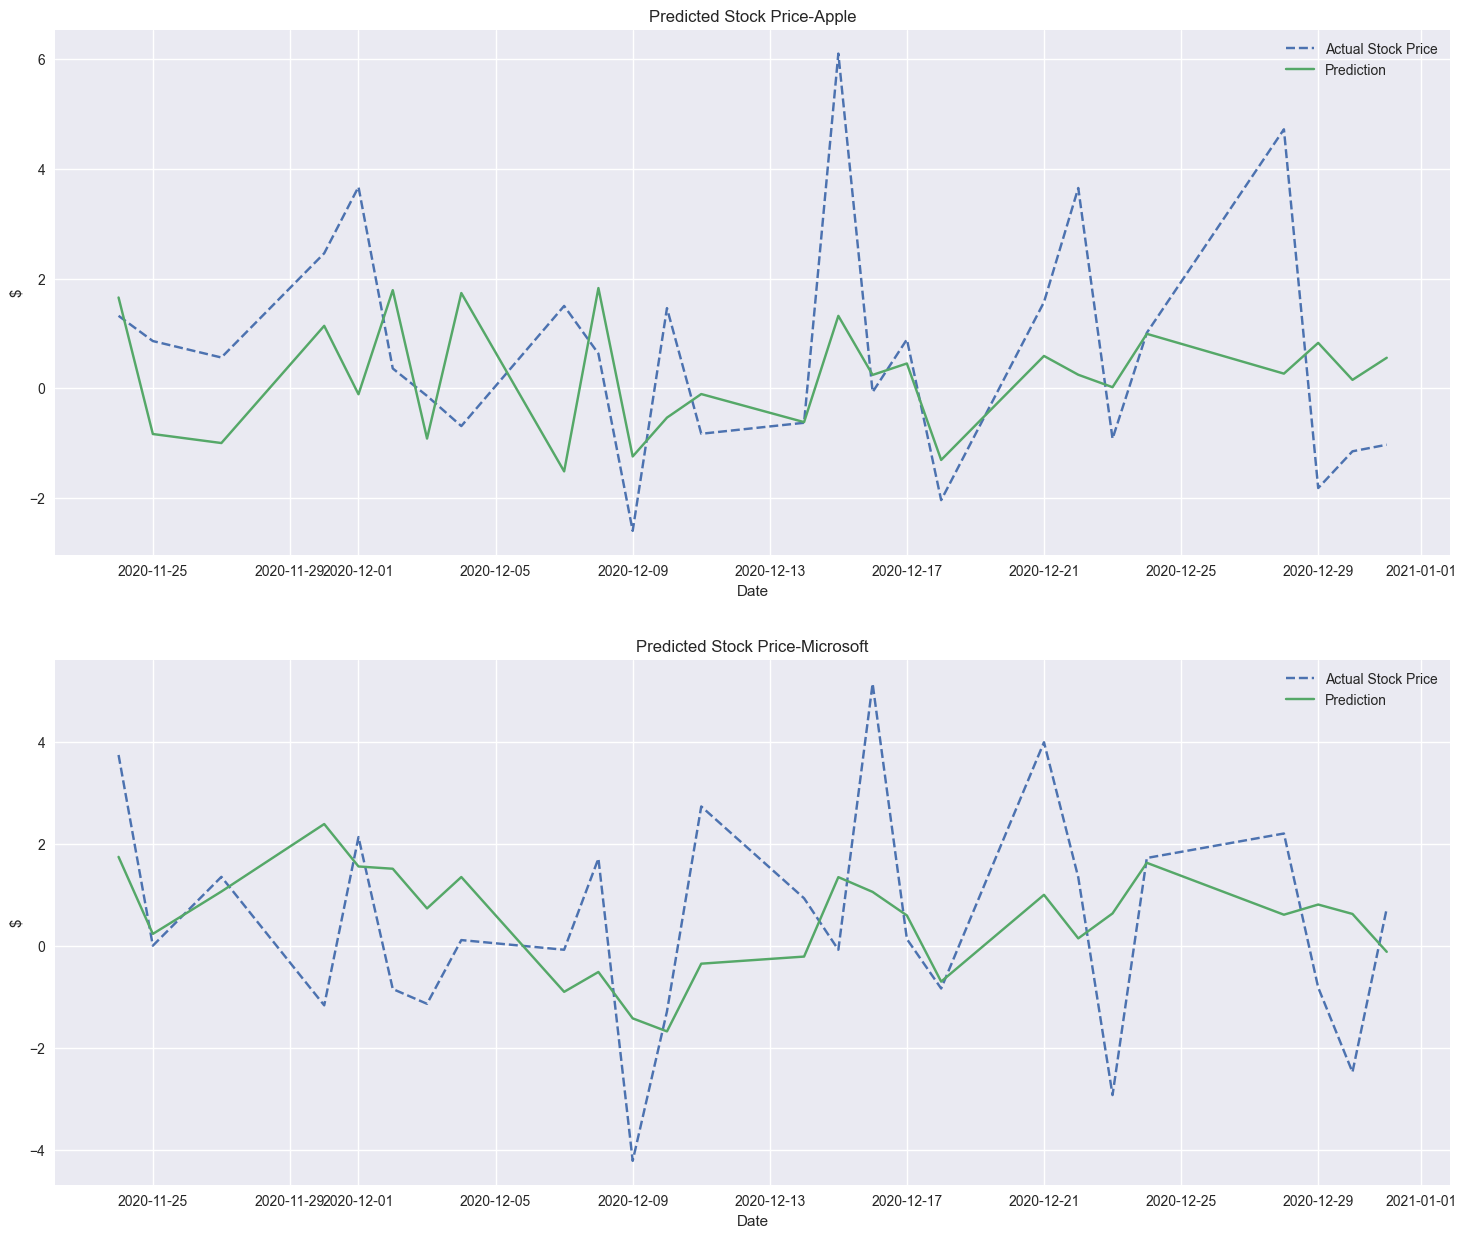

In [46]:
fig, ax = plt.subplots(2,1, figsize=(18, 15))
ax[0].plot(diff_test_aapl, label='Actual Stock Price', linestyle='--')
ax[0].plot(ar_predictions_aapl, linestyle='solid', label="Prediction")
ax[0].set_title('Predicted Stock Price-Apple')
ax[0].legend(loc='best')
ax[1].plot(diff_test_msft, label='Actual Stock Price', linestyle='--')
ax[1].plot(ar_predictions_msft, linestyle='solid', label="Prediction")
ax[1].set_title('Predicted Stock Price-Microsoft')
ax[1].legend(loc='best') 
for ax in ax.flat:
    ax.set(xlabel='Date', ylabel='$') 
plt.show()

In [62]:
from statsmodels.tsa.arima.model import ARIMA

In [63]:
split=int(len(stock_prices['AAPL'].values)*0.95)
train_aapl=stock_prices['AAPL'].iloc[:split]
test_aapl=stock_prices['AAPL'].iloc[split:]
train_msft=stock_prices['MSFT'].iloc[:split]
test_msft=stock_prices['MSFT'].iloc[split:]

In [70]:
arima_aapl=ARIMA(diff_train_aapl,order=(9,1,9))
arima_fit_aapl=arima_aapl.fit()

In [71]:
arima_msft=ARIMA(diff_train_msft, order=(6,1,6))
arima_fit_msft=arima_msft.fit()

In [72]:
arima_predict_aapl=arima_fit_aapl.predict(start=len(train_aapl),
                                          end=len(train_aapl)\
                                            +len(test_aapl)-1,
                                            dynamic=False)
arima_predict_msft=arima_fit_msft.predict(start=len(train_msft),
                                          end=len(train_msft)\
                                            +len(test_msft)-1,
                                            dynamic=False)

In [73]:
arima_predict_aapl=pd.DataFrame(arima_predict_aapl)
arima_predict_aapl.index=diff_test_aapl.index
arima_predict_msft=pd.DataFrame(arima_predict_msft)
arima_predict_msft.index=diff_test_msft.index

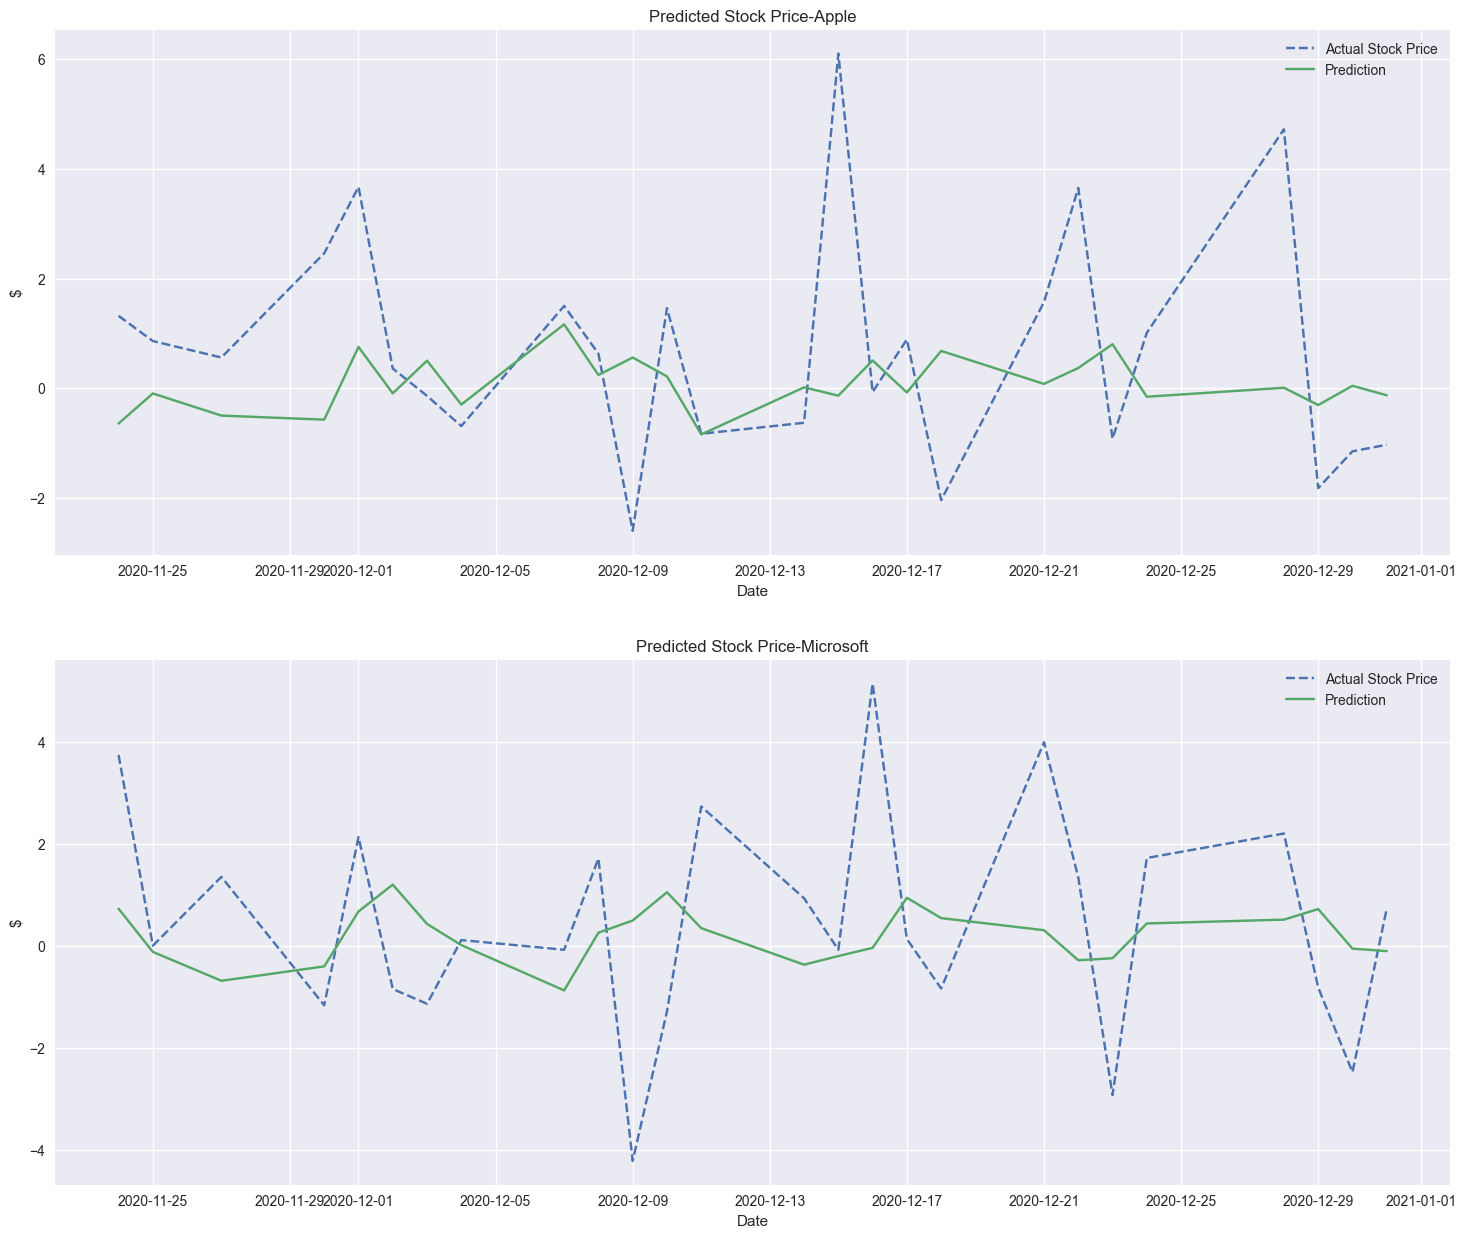

In [74]:
fig, ax = plt.subplots(2, 1, figsize=(18, 15))
ax[0].plot(diff_test_aapl, label='Actual Stock Price', linestyle='--')
ax[0].plot(arima_predict_aapl, linestyle='solid', label="Prediction")
ax[0].set_title('Predicted Stock Price-Apple')
ax[0].legend(loc='best')
ax[1].plot(diff_test_msft, label='Actual Stock Price', linestyle='--')
ax[1].plot(arima_predict_msft, linestyle='solid', label="Prediction")
ax[1].set_title('Predicted Stock Price-Microsoft')
ax[1].legend(loc='best') 
for ax in ax.flat:
    ax.set(xlabel='Date', ylabel='$') 
plt.show()

In [75]:
import itertools

In [83]:
p=q=range(0,9)
d=range(0,3)
pdq=list(itertools.product(p,d,q))
arima_results_aapl=[]
for param_set in pdq:
    try:
        arima_aapl=ARIMA(diff_train_aapl, order=param_set)
        arima_fitted_aapl=arima_aapl.fit()
        arima_results_aapl.append(arima_fitted_aapl.aic)
    except:
        continue
print('**'*25)
print('The Lowest AIC score is'+\
      '{:.4f}and the corresponding parameters are {}'.format(\
    pd.DataFrame(arima_results_aapl).where(\
    pd.DataFrame(arima_results_aapl).T.notnull().all()).min()[0],
    pdq[arima_results_aapl.index(min(arima_results_aapl))]))

**************************************************
The Lowest AIC score is1948.6675and the corresponding parameters are (4, 0, 3)


In [86]:
arima_aapl=ARIMA(diff_train_aapl, order=(4,1,4))
arima_fit_aapl=arima_aapl.fit()

In [93]:
p=q=range(0,6)
d=range(0,3)
pdq=list(itertools.product(p,d,q))
arima_results_msft=[]
for param_set in pdq:
    try:
        arima_msft=ARIMA(diff_train_msft, order=param_set)
        arima_fitted_msft=arima_msft.fit()
        arima_results_msft.append(arima_fitted_msft.aic)
    except:
        continue
print('**'*25)
print('The Lowest AIC score is'+\
      '{:.4f}and the corresponding parameters are {}'.format(\
    pd.DataFrame(arima_results_msft).where(\
    pd.DataFrame(arima_results_msft).T.notnull().all()).min()[0],
    pdq[arima_results_msft.index(min(arima_results_msft))]))

**************************************************
The Lowest AIC score is2519.5073and the corresponding parameters are (5, 0, 4)


In [94]:
arima_msft=ARIMA(diff_train_msft, order=(4,2,4))
arima_fit_msft=arima_msft.fit()

In [95]:
arima_predict_aapl = arima_fit_aapl.predict(start=len(train_aapl),
                                            end=len(train_aapl)\
                                            +len(test_aapl) - 1, dynamic=False)
arima_predict_msft = arima_fit_msft.predict(start=len(train_msft),
                                            end=len(train_msft)\
                                            + len(test_msft) - 1, dynamic=False)

In [96]:
arima_predict_aapl = pd.DataFrame(arima_predict_aapl)
arima_predict_aapl.index = diff_test_aapl.index
arima_predict_msft = pd.DataFrame(arima_predict_msft)
arima_predict_msft.index = diff_test_msft.index

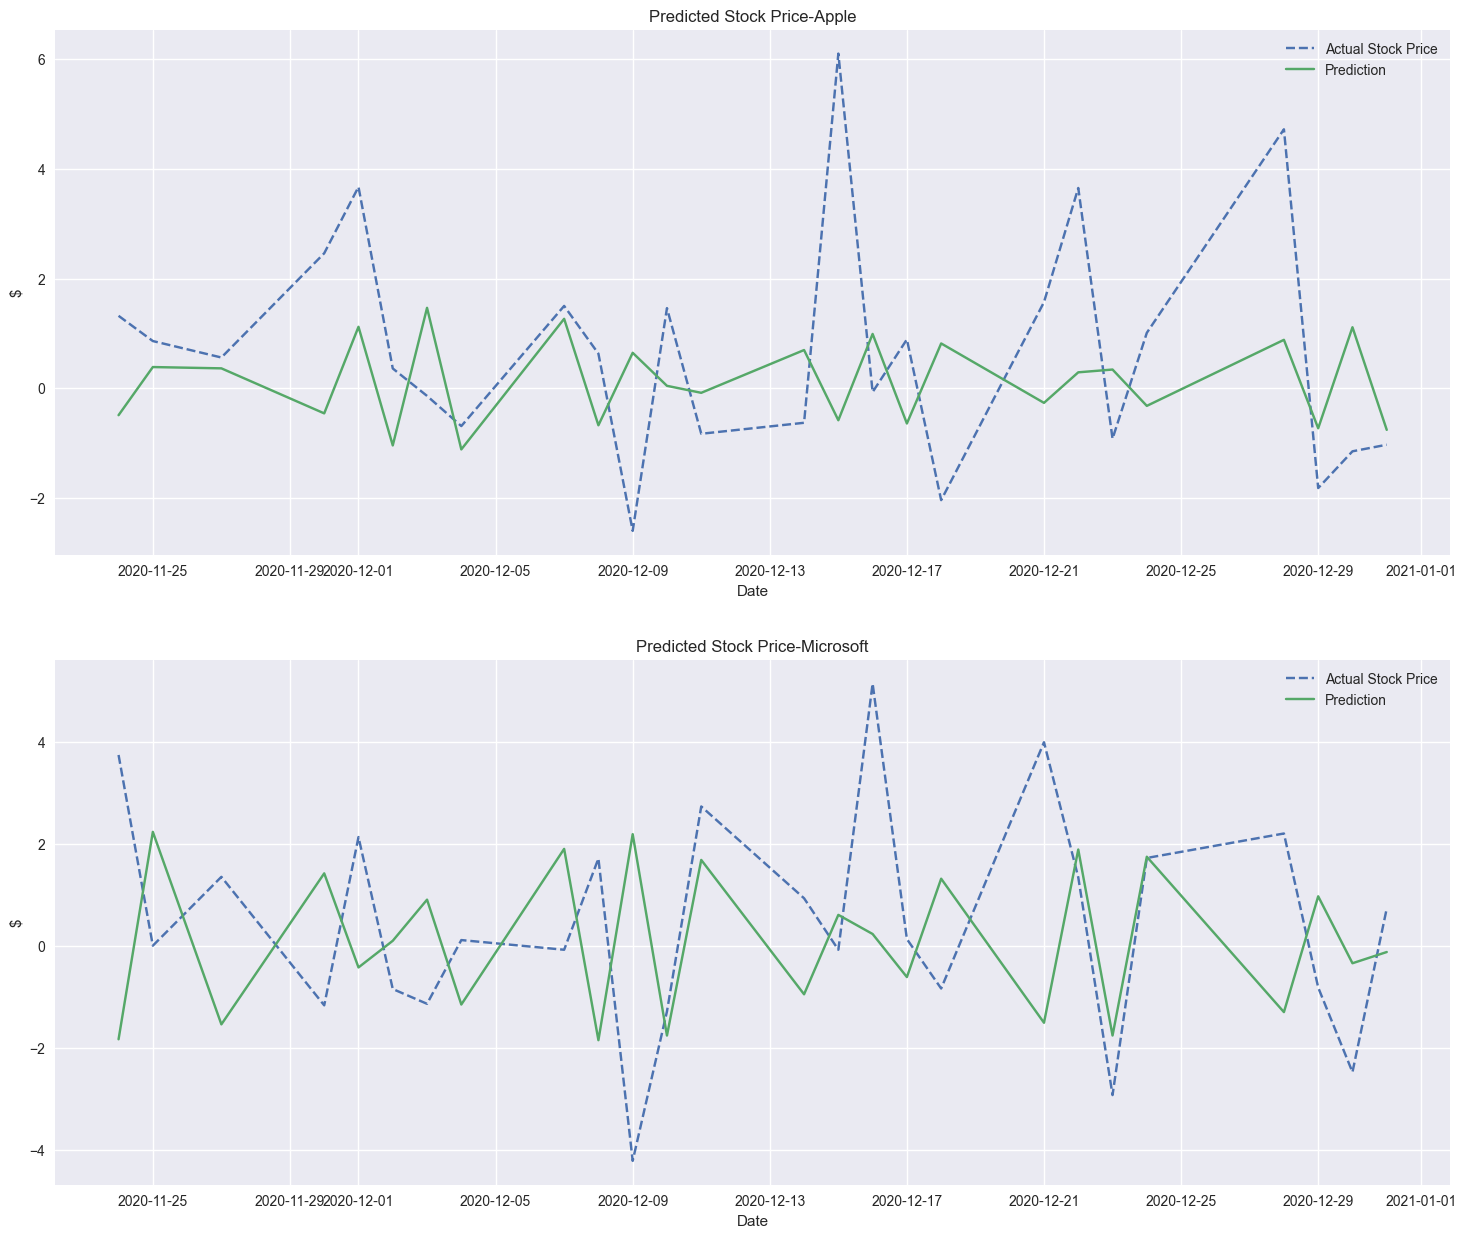

In [97]:
fig, ax = plt.subplots(2, 1, figsize=(18, 15))
ax[0].plot(diff_test_aapl, label='Actual Stock Price', linestyle='--')
ax[0].plot(arima_predict_aapl, linestyle='solid', label="Prediction")
ax[0].set_title('Predicted Stock Price-Apple')
ax[0].legend(loc='best')
ax[1].plot(diff_test_msft, label='Actual Stock Price', linestyle='--')
ax[1].plot(arima_predict_msft, linestyle='solid', label="Prediction")
ax[1].set_title('Predicted Stock Price-Microsoft')
ax[1].legend(loc='best') 
for ax in ax.flat:
    ax.set(xlabel='Date', ylabel='$') 
plt.show()